<h2 style='color:blue' align='center'>Data Augmentation To Address Overfitting In Flower Classification CNN</h2>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

We will download flowers dataset from google website and store it locally. In below call it downloads the zip file (.tgz) in cache_dir which is . meaning the current folder

<h3 style='color:purple'>Load flowers dataset</h3>

In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

228813984/228813984 [==============================] - 6s 0us/step


In [3]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [4]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/roses/16155980245_6ab8d7b888.jpg'),
 PosixPath('datasets/flower_photos/roses/8524505868_236f4c94b5.jpg'),
 PosixPath('datasets/flower_photos/roses/14267691818_301aceda07.jpg'),
 PosixPath('datasets/flower_photos/roses/16424992340_c1d9eb72b4.jpg'),
 PosixPath('datasets/flower_photos/roses/6950609394_c53b8c6ac0_m.jpg')]

In [5]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [6]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/16155980245_6ab8d7b888.jpg'),
 PosixPath('datasets/flower_photos/roses/8524505868_236f4c94b5.jpg'),
 PosixPath('datasets/flower_photos/roses/14267691818_301aceda07.jpg'),
 PosixPath('datasets/flower_photos/roses/16424992340_c1d9eb72b4.jpg'),
 PosixPath('datasets/flower_photos/roses/6950609394_c53b8c6ac0_m.jpg')]

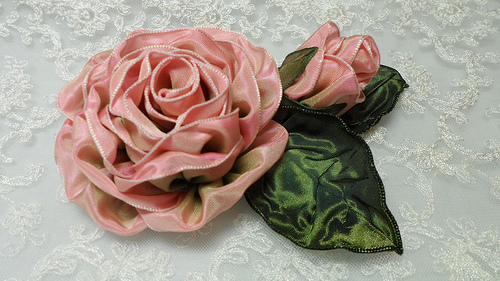

In [7]:
PIL.Image.open(str(roses[1]))

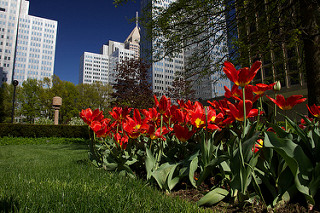

In [8]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

<h3 style='color:purple'>Read flowers images from disk into numpy array using opencv</h3>

In [7]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [8]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [10]:
flowers_images_dict['roses'][:5]

[PosixPath('datasets/flower_photos/roses/16155980245_6ab8d7b888.jpg'),
 PosixPath('datasets/flower_photos/roses/8524505868_236f4c94b5.jpg'),
 PosixPath('datasets/flower_photos/roses/14267691818_301aceda07.jpg'),
 PosixPath('datasets/flower_photos/roses/16424992340_c1d9eb72b4.jpg'),
 PosixPath('datasets/flower_photos/roses/6950609394_c53b8c6ac0_m.jpg')]

In [ ]:
str(flowers_images_dict['roses'][0])

'datasets/flower_photos/roses/7865295712_bcc94d120c.jpg'

In [9]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [15]:
img.shape

(333, 500, 3)

In [10]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [11]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [12]:
X = np.array(X)
y = np.array(y)

<h3 style='color:purple'>Train test split</h3>

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [19]:
print(len(X_train)+ len(X_test))
print(len(X_train))
print(len(X_test))

3670
2752
918


<h3 style='color:purple'>Preprocessing: scale images</h3>

In [14]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

<h3 style='color:purple'>Build convolutional neural network and train it</h3>

In [15]:
num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30
86/86 [==============================] - 8s 21ms/step - loss: 1.2817 - accuracy: 0.4571
Epoch 2/30
86/86 [==============================] - 2s 24ms/step - loss: 0.9550 - accuracy: 0.6301
Epoch 3/30
86/86 [==============================] - 3s 35ms/step - loss: 0.7079 - accuracy: 0.7264
Epoch 4/30
86/86 [==============================] - 2s 24ms/step - loss: 0.5046 - accuracy: 0.8121
Epoch 5/30
86/86 [==============================] - 2s 25ms/step - loss: 0.3135 - accuracy: 0.8924
Epoch 6/30
86/86 [==============================] - 3s 32ms/step - loss: 0.1399 - accuracy: 0.9589
Epoch 7/30
86/86 [==============================] - 2s 21ms/step - loss: 0.0954 - accuracy: 0.9735
Epoch 8/30
86/86 [==============================] - 2s 22ms/step - loss: 0.0692 - accuracy: 0.9811
Epoch 9/30
86/86 [==============================] - 2s 24ms/step - loss: 0.0439 - accuracy: 0.9920
Epoch 10/30
86/86 [==============================] - 2s 21ms/step - loss: 0.0340 - accuracy: 0.9906
Epoch 11/

In [16]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 1s 17ms/step - loss: 2.8386 - accuracy: 0.6525


[2.8386192321777344, 0.6525054574012756]

**Here we see that while train accuracy is very high (99%), the test accuracy is significantly low (66.99%) indicating overfitting. Let's make some predictions before we use data augmentation to address overfitting**

In [17]:
predictions = model.predict(X_test_scaled)
predictions

29/29 [==============================] - 0s 11ms/step


array([[ -0.7135419 ,   8.45325   ,   3.05827   ,  -5.927197  ,
          7.681838  ],
       [ 14.723603  ,   5.328823  ,   8.925525  , -21.917313  ,
         -0.84840196],
       [ -2.8887143 ,   1.9668807 ,  26.635363  , -20.181084  ,
         -8.043022  ],
       ...,
       [-14.257869  ,  -1.8222115 ,   0.7290476 ,  20.539337  ,
          4.022521  ],
       [ 23.594395  ,   3.79802   ,  -1.7185143 , -15.403586  ,
         10.41808   ],
       [ -9.175299  ,  -5.5834594 ,  -3.3660688 ,  23.644747  ,
          8.743919  ]], dtype=float32)

In [18]:
score = tf.nn.softmax(predictions[0])

In [21]:
np.argmax(score)

4

In [23]:
y_test[0]

1

<h3 style='color:purple'>Improve Test Accuracy Using Data Augmentation</h3>

In [19]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal",
                                                 input_shape=(180,
                                                            180,
                                                              3)),
    layers.experimental.preprocessing.RandomFlip("vertical",
                                                 input_shape=(180,
                                                            180,
                                                              3)),
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical",
                                                 input_shape=(180,
                                                            180,
                                                              3)),
  ]
)

**Original Image**

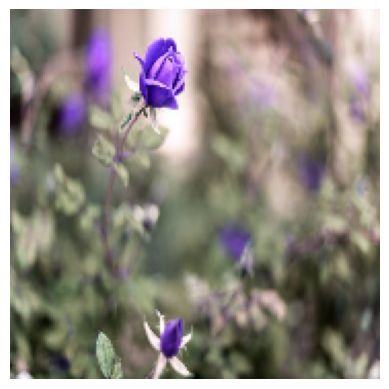

In [20]:
plt.axis('off')
plt.imshow(X[0])

**Newly generated training sample using data augmentation**

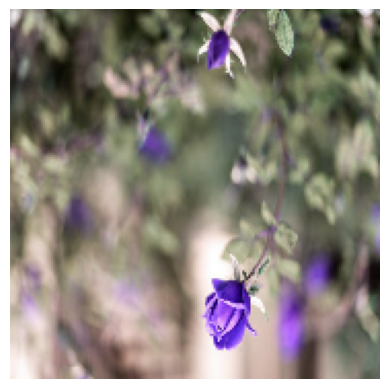

In [21]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

<h3 style='color:purple'>Train the model using data augmentation and a drop out layer</h3>

In [22]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30
86/86 [==============================] - 5s 30ms/step - loss: 1.4952 - accuracy: 0.3557
Epoch 2/30
86/86 [==============================] - 3s 29ms/step - loss: 1.1313 - accuracy: 0.5389
Epoch 3/30
86/86 [==============================] - 3s 31ms/step - loss: 1.0001 - accuracy: 0.5934
Epoch 4/30
86/86 [==============================] - 3s 30ms/step - loss: 0.9467 - accuracy: 0.6265
Epoch 5/30
86/86 [==============================] - 3s 29ms/step - loss: 0.8637 - accuracy: 0.6635
Epoch 6/30
86/86 [==============================] - 3s 29ms/step - loss: 0.7650 - accuracy: 0.7137
Epoch 7/30
86/86 [==============================] - 3s 29ms/step - loss: 0.7156 - accuracy: 0.7202
Epoch 8/30
86/86 [==============================] - 3s 31ms/step - loss: 0.6436 - accuracy: 0.7573
Epoch 9/30
86/86 [==============================] - 3s 31ms/step - loss: 0.5986 - accuracy: 0.7787
Epoch 10/30
86/86 [==============================] - 3s 30ms/step - loss: 0.5625 - accuracy: 0.7867
Epoch 11/

In [23]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 1s 13ms/step - loss: 1.4986 - accuracy: 0.7048


[1.4985698461532593, 0.7047930359840393]

**You can see that by using data augmentation and drop out layer the accuracy of test set predictions is increased to 73.74%**